In [13]:
#입력단에 회귀는 액비티엑트펑션 필요없지만 은식단에 무조건 필요 뉴련에서 뉴런은 무조건 actf해줘야함
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler#전처리작업
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
tf.random.set_seed(42)
data = fetch_california_housing() #데이터 꺼내옴
in_data=StandardScaler().fit_transform(data.data)
x_data,tt_x,y_data,tt_y=train_test_split(in_data,data.target,random_state=42)
#x_data,tt_x,y_data,tt_x=train_test_split(data.data,data.target,random_state=42)
t_x,v_x,t_y,v_y = train_test_split(x_data,y_data,random_state=42,test_size=0.2)
"""
s=StandardScaler()
t_x=s.fit_transform(t_x)
v_x=s.fit_transform(v_x)
tt_v=s.fit_transform(tt_v)
"""
t_x.shape[1:]#입력 data의 차원의 형상

(8,)

In [2]:
#입력단에 회귀는 액비티엑트펑션 필요없지만 은식단에 무조건 필요 뉴련에서 뉴런은 무조건 actf해줘야함
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler#전처리작업
data = fetch_california_housing() #데이터 꺼내옴
x_data,tt_x,y_data,tt_y=train_test_split(data.data,data.target,random_state=42)
t_x,v_x,t_y,v_y = train_test_split(x_data,y_data,random_state=42,test_size=0.2)

s=StandardScaler()
t_x=s.fit_transform(t_x)
v_x=s.fit_transform(v_x)
tt_x=s.fit_transform(tt_x)

t_x.shape

(12384, 8)

In [3]:
m=keras.models.Sequential()
m.add(keras.layers.Flatten(input_shape=t_x.shape[1:]))
m.add(keras.layers.Dense(30,activation='relu'))
m.add(keras.layers.Dense(1))
m.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


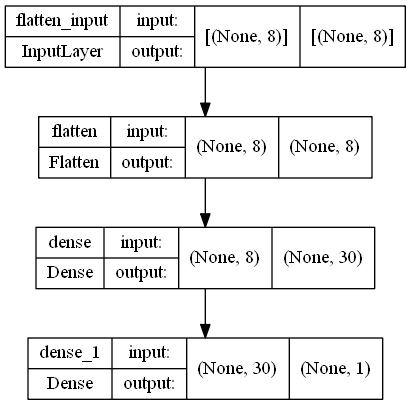

In [4]:
keras.utils.plot_model(m,'m.png',show_shapes=True)

In [6]:
m.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-3),loss='mean_squared_error')
hy=m.fit(t_x,t_y,validation_data=(v_x,v_y),epochs=20)
t_hy=m.evaluate(tt_x,tt_y)

Epoch 1/20
387/387 [==============================] - 1s 1ms/step - loss: 1.6521 - val_loss: 0.7673
Epoch 2/20
387/387 [==============================] - 0s 1ms/step - loss: 0.7247 - val_loss: 0.6498
Epoch 3/20
387/387 [==============================] - 0s 1ms/step - loss: 0.6559 - val_loss: 0.6046
Epoch 4/20
387/387 [==============================] - 0s 1ms/step - loss: 0.6216 - val_loss: 0.5804
Epoch 5/20
387/387 [==============================] - 0s 1ms/step - loss: 0.5954 - val_loss: 0.5555
Epoch 6/20
387/387 [==============================] - 0s 1ms/step - loss: 0.5743 - val_loss: 0.5393
Epoch 7/20
387/387 [==============================] - 0s 1ms/step - loss: 0.5565 - val_loss: 0.5250
Epoch 8/20
387/387 [==============================] - 0s 1ms/step - loss: 0.5419 - val_loss: 0.5138
Epoch 9/20
387/387 [==============================] - 0s 1ms/step - loss: 0.5301 - val_loss: 0.5024
Epoch 10/20
387/387 [==============================] - 0s 1ms/step - loss: 0.5192 - val_loss: 0.4954

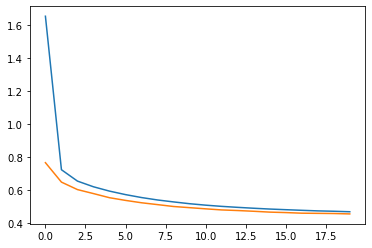

In [14]:
plt.plot(pd.DataFrame(hy.history))

In [20]:
m.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-3),loss='mean_squared_error',metrics='accuracy')#metrics정확도
hy=m.fit(t_x,t_y,validation_data=(v_x,v_y),epochs=20)
t_hy=m.evaluate(tt_x,tt_y)

Epoch 1/20
387/387 [==============================] - 1s 1ms/step - loss: 0.4396 - accuracy: 0.0033 - val_loss: 0.4159 - val_accuracy: 0.0032
Epoch 2/20
387/387 [==============================] - 1s 1ms/step - loss: 0.4375 - accuracy: 0.0033 - val_loss: 0.4202 - val_accuracy: 0.0032
Epoch 3/20
387/387 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.0033 - val_loss: 0.4138 - val_accuracy: 0.0032
Epoch 4/20
387/387 [==============================] - 0s 1ms/step - loss: 0.4356 - accuracy: 0.0033 - val_loss: 0.4146 - val_accuracy: 0.0032
Epoch 5/20
387/387 [==============================] - 0s 1ms/step - loss: 0.4348 - accuracy: 0.0033 - val_loss: 0.4123 - val_accuracy: 0.0032
Epoch 6/20
387/387 [==============================] - 0s 1ms/step - loss: 0.4339 - accuracy: 0.0033 - val_loss: 0.4147 - val_accuracy: 0.0032
Epoch 7/20
387/387 [==============================] - 1s 2ms/step - loss: 0.4333 - accuracy: 0.0033 - val_loss: 0.4108 - val_accuracy: 0.0032
Epoch 

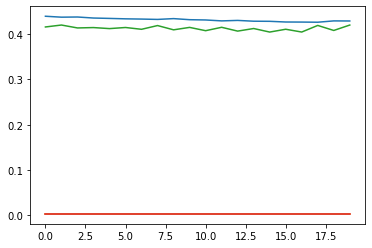

In [22]:
plt.plot(pd.DataFrame(hy.history))

In [23]:
tt_x[:3]

array([[-1.15248922, -0.2891866 , -0.49989596, -0.15697642, -0.02956174,
         0.07768129,  0.20044873,  0.27936569],
       [-0.70501534,  0.10810379, -0.1574771 ,  0.20430076,  0.12320645,
        -0.03763415, -0.23028292,  0.05475686],
       [-0.20558796,  1.85618152, -0.5868143 ,  0.1882305 , -0.1019721 ,
        -0.164679  ,  1.01509336, -1.43265267]])

In [24]:
tt_y[:3]

array([0.477  , 0.458  , 5.00001])

In [25]:
m.predict(tt_x[:3])

array([[0.5522119],
       [1.7749662],
       [3.0829957]], dtype=float32)